In [1]:
import pandas as pd

df_wifi = pd.read_csv('privamov/privamov-wifi', sep='\t', nrows=1000000, header=None, names=['id', 'timestamp','wifi'], parse_dates=['timestamp'], index_col='timestamp')

In [2]:
df_wifi

,id,wifi
timestamp,,
2014-10-06 12:56:50.500,1,84:a6:c8:a9:c2:d9
2014-10-06 12:56:50.510,1,9c:1c:12:24:b4:d1
2014-10-06 12:56:50.515,1,9c:1c:12:24:af:31
2014-10-06 12:56:50.516,1,9c:1c:12:2b:c3:f1
2014-10-04 19:43:14.986,1,20:e5:2a:5b:bf:e0
...,...,...
2015-01-19 09:51:53.904,6,c8:d3:a3:06:f6:0e
2015-01-19 09:51:53.914,6,9c:1c:12:2b:b1:59
2015-01-19 09:51:53.917,6,9c:1c:12:2b:b1:58


In [3]:
df_wifi_timerange= df_wifi.between_time('22:00', '6:00')
df_wifi_timerange

,id,wifi
timestamp,,
2014-11-24 22:08:57.154,6,00:17:33:78:a0:f8
2014-11-24 22:08:57.168,6,a2:17:33:78:a0:fb
2014-11-24 22:08:57.184,6,a2:17:33:78:a0:f9
2014-11-24 22:08:57.203,6,52:1f:9f:f5:d2:a4
2014-11-24 22:08:57.229,6,00:1f:9f:f5:d2:a7
...,...,...
2015-01-19 05:11:23.226,6,d2:17:33:d1:4e:a7
2015-01-19 05:11:23.282,6,f4:ca:e5:cc:a7:8d
2015-01-19 05:11:23.296,6,14:0c:76:f6:1e:d1


In [4]:
df_wifi_update=pd.DataFrame({'count' : df_wifi_timerange.groupby( [ "wifi", "id"] ).size()}).reset_index()
df_wifi_update

,wifi,id,count
0,00:02:6f:e6:d3:4a,1,6
1,00:02:6f:e6:d6:9c,1,4
2,00:02:6f:e7:12:64,1,2
3,00:02:6f:ea:c0:60,1,2
4,00:02:6f:ea:c0:64,1,2
...,...,...,...
7697,fc:fb:fb:6a:ca:41,1,2
7698,fe:9b:2f:0f:65:1a,1,1
7699,fe:c2:de:50:2a:16,1,2
7700,fe:df:a8:cf:e4:37,17,2


In [5]:
value_counts = df_wifi_update['wifi'].value_counts()

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['wifi_unique', 'Nb_Id'] 

In [6]:
df_value_counts

,wifi_unique,Nb_Id
0,56:01:70:a4:17:84,9
1,56:01:70:a4:17:86,8
2,56:01:70:a4:17:87,7
3,22:e8:a4:e8:fa:87,6
4,e6:65:b2:d8:f5:b6,6
...,...,...
7166,30:7e:cb:e4:06:ac,1
7167,3a:18:0a:26:8d:82,1
7168,c6:60:ed:22:24:69,1
7169,c2:25:15:d4:dc:0f,1


In [7]:
for i in range(len(df_wifi_update)):
    if(int(df_value_counts[ df_value_counts['wifi_unique'] == df_wifi_update["wifi"][i] ]["Nb_Id"]) == 1 ) :
        df_wifi_update=df_wifi_update.drop([i])




    

In [8]:
value_counts = df_wifi_update['wifi'].value_counts()

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['wifi_unique', 'Nb_Id'] 
df_val_counts

,wifi
56:01:70:a4:17:84,9
56:01:70:a4:17:86,8
56:01:70:a4:17:87,7
e6:65:b2:d8:f5:b6,6
0e:76:6b:29:10:48,6
...,...
f4:ca:e5:a8:59:62,2
00:1d:6a:49:54:77,2
a2:a1:d7:0f:af:bd,2
00:78:9e:7c:64:00,2


In [9]:
""" a=df_wifi_update[df_wifi_update["wifi"] == "9c:1c:12:2b:c3:f1"]

df_val_counts = pd.DataFrame(a)
df_value_counts_test = df_val_counts.reset_index()
df_value_counts_test.columns = ['supprimer','wifi','id', 'count'] 
df_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])
 """

' a=df_wifi_update[df_wifi_update["wifi"] == "9c:1c:12:2b:c3:f1"]\n\ndf_val_counts = pd.DataFrame(a)\ndf_value_counts_test = df_val_counts.reset_index()\ndf_value_counts_test.columns = [\'supprimer\',\'wifi\',\'id\', \'count\'] \ndf_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])\n '

In [10]:
"""df_value_counts_test"""

'df_value_counts_test'

In [11]:
final = pd.DataFrame(columns = ['ID1', 'ID2', 'length','wifi'])

In [12]:
s=0
for wifi in range(len(df_value_counts)):
    element= df_wifi_update[df_wifi_update["wifi"] == df_value_counts['wifi_unique'][wifi]]
    df_val_counts = pd.DataFrame(element)
    df_value_counts_test = df_val_counts.reset_index()
    df_value_counts_test.columns = ['supprimer','wifi','id', 'count'] 
    df_value_counts_test=df_value_counts_test.drop(columns=["supprimer"])
    for i in range(len(df_value_counts_test)):
        j=i+1
        while(j <len(df_value_counts_test)):
            final.loc[s]=[df_value_counts_test["id"][i],df_value_counts_test["id"][j],min(df_value_counts_test["count"][i],df_value_counts_test["count"][j]),df_value_counts_test["wifi"][i]]
            j=j+1
            s+=1

        

In [13]:
final

,ID1,ID2,length,wifi
0,1,2,18,56:01:70:a4:17:84
1,1,6,10,56:01:70:a4:17:84
2,1,7,1,56:01:70:a4:17:84
3,1,8,136,56:01:70:a4:17:84
4,1,15,136,56:01:70:a4:17:84
...,...,...,...,...
844,14,25,2,f4:ca:e5:a8:59:62
845,17,25,19,00:1d:6a:49:54:77
846,19,24,8,a2:a1:d7:0f:af:bd
847,15,17,2,00:78:9e:7c:64:00


In [23]:
final_sorted = final.sort_values(by=['length'], ascending=False)
final_sorted

,ID1,ID2,length,wifi
395,1,5,743,24:95:04:0d:fc:a4
341,1,5,742,d2:95:04:0d:fc:a7
443,1,5,742,d2:95:04:0d:fc:a5
389,1,5,506,f4:ca:e5:e1:92:9c
329,1,5,505,f4:ca:e5:e1:92:9d
...,...,...,...,...
613,19,23,1,40:18:b1:73:c7:94
184,8,11,1,22:e8:a4:e8:fa:86
705,19,23,1,40:18:b1:82:cb:d4
773,1,2,1,d6:9f:bf:e9:ce:15


In [14]:
resultt=pd.DataFrame({'Nbre-repeat' : final.groupby( [ "ID1", "ID2"] ).size()}).reset_index()

result=final.groupby(['ID1', 'ID2']).sum()['length'].reset_index()

In [15]:
resultt

,ID1,ID2,Nbre-repeat
0,1,2,32
1,1,5,18
2,1,6,44
3,1,7,7
4,1,8,36
...,...,...,...
65,17,25,27
66,19,20,5
67,19,23,13
68,19,24,19


In [16]:
result

,ID1,ID2,length
0,1,2,241
1,1,5,5590
2,1,6,193
3,1,7,21
4,1,8,507
...,...,...,...
65,17,25,194
66,19,20,12
67,19,23,13
68,19,24,737


In [22]:
result_sorted = result.sort_values(by=['length'], ascending=False)
result_sorted

,ID1,ID2,length
1,1,5,5590
55,14,21,2058
68,19,24,737
11,1,23,615
24,5,23,601
...,...,...,...
60,15,24,2
49,11,25,2
35,7,14,2
15,2,7,1


In [17]:

import networkx as nx

G = nx.from_pandas_edgelist(df=result, source='ID1', target='ID2', edge_attr='length')

G.add_nodes_from(nodes_for_adding=result.ID1.tolist())

In [18]:
G.edges(data=True)

EdgeDataView([(1, 2, {'length': 241}), (1, 5, {'length': 5590}), (1, 6, {'length': 193}), (1, 7, {'length': 21}), (1, 8, {'length': 507}), (1, 11, {'length': 31}), (1, 12, {'length': 204}), (1, 15, {'length': 561}), (1, 17, {'length': 219}), (1, 19, {'length': 10}), (1, 20, {'length': 42}), (1, 23, {'length': 615}), (1, 24, {'length': 111}), (1, 25, {'length': 6}), (2, 6, {'length': 130}), (2, 7, {'length': 1}), (2, 8, {'length': 94}), (2, 11, {'length': 7}), (2, 15, {'length': 52}), (2, 17, {'length': 133}), (2, 19, {'length': 14}), (2, 20, {'length': 8}), (2, 25, {'length': 32}), (5, 12, {'length': 96}), (5, 23, {'length': 601}), (6, 7, {'length': 54}), (6, 8, {'length': 84}), (6, 11, {'length': 7}), (6, 15, {'length': 68}), (6, 17, {'length': 116}), (6, 19, {'length': 4}), (6, 20, {'length': 73}), (6, 24, {'length': 7}), (6, 25, {'length': 45}), (7, 8, {'length': 7}), (7, 14, {'length': 2}), (7, 15, {'length': 47}), (7, 17, {'length': 3}), (7, 19, {'length': 1}), (7, 20, {'length': 

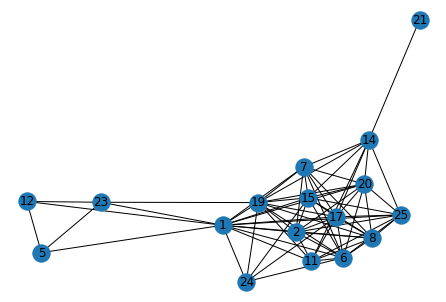

In [19]:
weights = [i['length']/100 for i in dict(G.edges).values()]

nx.draw(G, with_labels = True)